## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [31]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [32]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [33]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [34]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


**<font color='teal'> Plot histograms of each column. </font>**

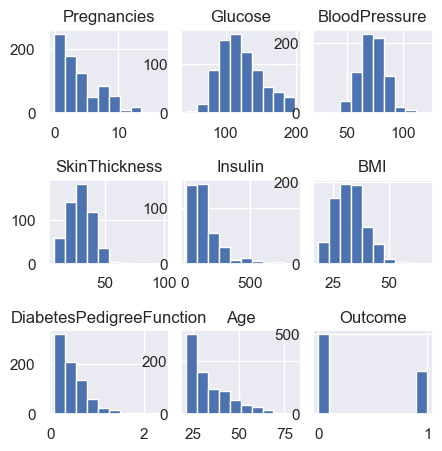

In [35]:
diabetes_data.hist()
plt.subplots_adjust(left=0.1, right=0.7, bottom=0.1, top=0.9, wspace=0.1, hspace=0.8)

#### Replace the zeros with mean and median values.

In [36]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

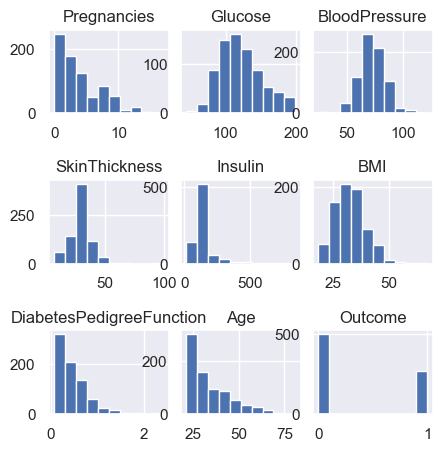

In [37]:
diabetes_data.hist()
plt.subplots_adjust(left=0.1, right=0.7, bottom=0.1, top=0.9, wspace=0.1, hspace=0.8)

#### Plot the correlation matrix heatmap

Correlation between various features


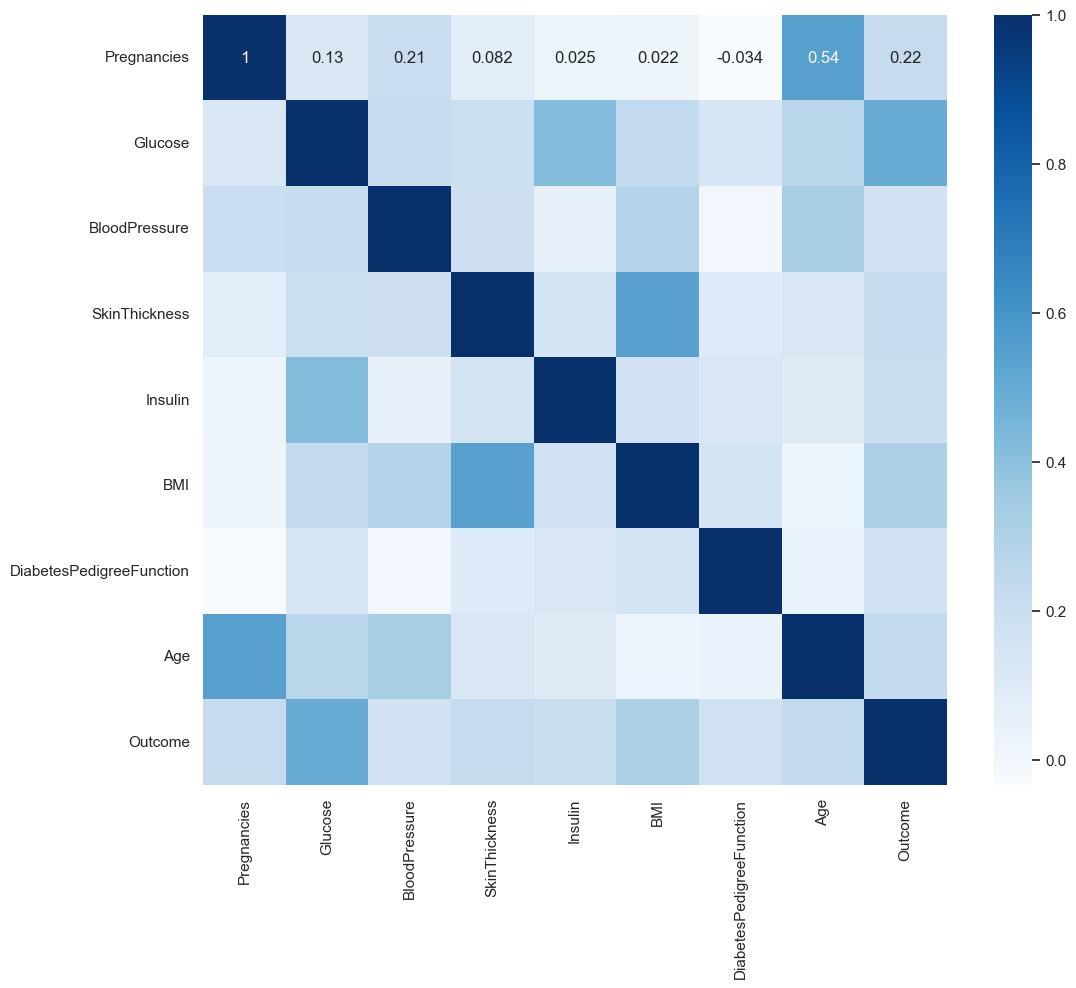

In [38]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [39]:
y = diabetes_data['Outcome']
x = diabetes_data.drop(['Outcome'], axis=1)

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [41]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [42]:
#AP: made the lists into dicts to identify the k-value even easier
from sklearn.neighbors import KNeighborsClassifier

train_scores = {}
test_scores = {}

for i in range(1,10):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    
    train_scores[i] = (knn.score(X_train, y_train)) #knn.score returns the mean accuracy
    test_scores[i] = (knn.score(X_test, y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [43]:
print('train scores:', train_scores)
print('test scores:', test_scores)

train scores: {1: 1.0, 2: 0.8559027777777778, 3: 0.8489583333333334, 4: 0.8315972222222222, 5: 0.8385416666666666, 6: 0.8229166666666666, 7: 0.828125, 8: 0.8142361111111112, 9: 0.8211805555555556}
test scores: {1: 0.625, 2: 0.65625, 3: 0.6979166666666666, 4: 0.6822916666666666, 5: 0.6927083333333334, 6: 0.6875, 7: 0.6979166666666666, 8: 0.7135416666666666, 9: 0.7135416666666666}


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [44]:
print(max(train_scores, key=train_scores.get))

1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [45]:
print(max(test_scores, key=test_scores.get))

8


In [46]:
#AP Checking if scores for k=8 & k=9 are the same since they seem so from the scores above due to rounding
print(test_scores[7] == test_scores[8])

False


Plot the train and test model performance by number of neighbors.

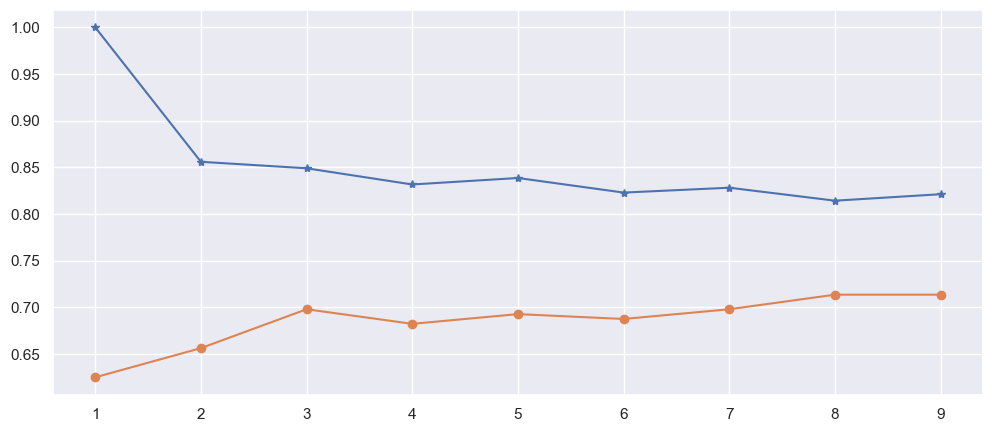

In [47]:
plt.figure(figsize=(12,5))
p = plt.plot(range(1,10), train_scores.values(), marker='*', label='Train Score')
p = plt.plot(range(1,10), test_scores.values(), marker='o', label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [48]:
#AP: best n_neighbors = 1 for train data, best n_neighbors=8 for test data
knn_train = KNeighborsClassifier(n_neighbors = 1)
knn_train.fit(X_train,y_train)
knn_train_score = knn_train.score(X_train, y_train)

knn_test = KNeighborsClassifier(n_neighbors = 8)
knn_test.fit(X_train,y_train)
knn_test_score = knn_test.score(X_test, y_test)

print('Test score (k=1):', knn_train_score)
print('Train score (k=8):', knn_test_score)

Test score (k=1): 1.0
Train score (k=8): 0.7135416666666666


In [49]:
from sklearn.metrics import confusion_matrix
y_predict_test = knn.predict(X_test)
pl = confusion_matrix(y_test, y_predict_test)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [50]:
#AP: sns.heatmap way, I like the confusonmatrixdisplay(...) way better
#sns.heatmap(pl, annot=True)

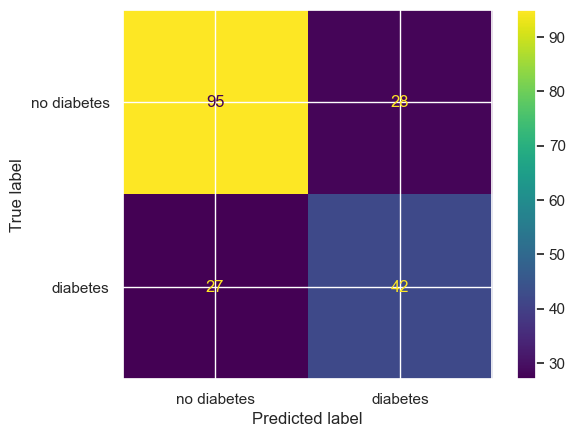

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
display_cm = ConfusionMatrixDisplay(confusion_matrix = pl, display_labels = ['no diabetes', 'diabetes'])

_, ax = plt.subplots()
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no diabetes', 'diabetes'])
ax.set_yticklabels(labels = ['no diabetes', 'diabetes'])
display_cm.plot(ax = ax)

**<font color='teal'> Print the classification report </font>**

In [52]:
from sklearn.metrics import classification_report

#AP: Test data Classification report
y_predict_training = knn.predict(X_train)
classrep_train = classification_report(y_true= y_train, y_pred= y_predict_training)
print('Test data Classification report:\n', classrep_train)
print('\n')
#AP: Test data Classification report
classrep_test = classification_report(y_true= y_test, y_pred= y_predict_test)
print('Train data Classification report:\n', classrep_test)

Test data Classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       377
           1       0.78      0.67      0.72       199

    accuracy                           0.82       576
   macro avg       0.81      0.79      0.79       576
weighted avg       0.82      0.82      0.82       576



Train data Classification report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78       123
           1       0.60      0.61      0.60        69

    accuracy                           0.71       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.71      0.71      0.71       192



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [54]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
param_grid = {'n_estimators':np.arange(1,50)}

rfclf = RandomForestClassifier()
rfclf_cv = GridSearchCV(rfclf, param_grid)
rfclf_cv.fit(x, y)

print("Best Score:" + str(rfclf_cv.best_score_))
print("Best Parameters: " + str(rfclf_cv.best_params_))

Best Score:0.7735081911552498
Best Parameters: {'n_estimators': 16}
